# Plant Disease Classification - Training Baseline Models

This notebook explores the training of baseline models for plant disease classification. Here, we train three pre-trained deep learning models on the [plant disease classification merged dataset](https://www.kaggle.com/datasets/alinedobrovsky/plant-disease-classification-merged-dataset/data).

### Importing Libraries needed

First, we import all  the necessary libraries for data analysis as seen below:

In [9]:
# importing the fastai libraries for computer vision
from fastcore.all import *
from fastai.vision.all import *

from fastai.metrics import accuracy, F1Score, Precision, Recall
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
#importing supplementary libraries
import warnings
warnings.filterwarnings('ignore') 

### Setting the Data path object

We then set up the path object from our downloaded dataset directory as seen below:

In [3]:
data_dir = '/home/roach/plantdisease/data'

In [4]:
path = Path(data_dir)

### Putting Data in Dataloaders

In this section we load our data into Dataloaders which is a class that allows data to be loaded for training. Additionally, it simplifies processes like batch loading, data augmentation, data resizing, splitting data into training and validation, among others.

In [5]:
# Define a DataBlock for image classification using fastai
plt_dis = DataBlock(
    # Specify the types of blocks (ImageBlock for images, CategoryBlock for categories/labels)
    blocks=(ImageBlock, CategoryBlock),
    
    # Function to get the items (in this case, image files)
    get_items=get_image_files,
    
    # Splitter function to split data into training and validation sets randomly (with a seed for reproducibility)
    splitter=RandomSplitter(seed=42),
    
    # Function to get the labels (in this case, parent folder labels)
    get_y=parent_label,
    
    # Transformations to apply to each item (resizing images to 460x460)
    item_tfms=Resize(460),
    
    # Batch-level transformations (data augmentations like resizing and random flips)
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)


In [6]:
# Create DataLoaders using the plt_dis DataBlock for image classification on the dataset located at 'path'.
dls = plt_dis.dataloaders(path, bs=32)

With the dataloader, we can show a few images from our dataset:

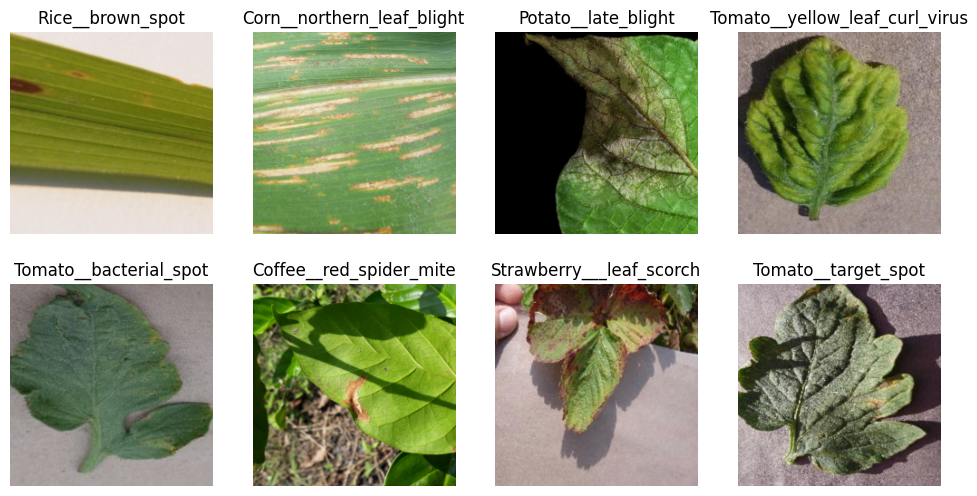

In [7]:
# Display a batch of data from the DataLoaders object 
dls.show_batch(nrows = 2, ncols = 4)

### Training Baseline Models

Baseline models serves as simple starting point that help establish a minimum performance expectation for a given problem and provide a benchmark that more complex models should ideally outperform.  

In this section, we first train the pretrained models and evaluate it against the accuracy metric.

#### Model 1: Resnet18

In [10]:
# Creating a vision learner using the DataLoaders 'dls', ResNet-18 architecture, and optimizing for accuracy metrics,
# and fine-tune the model for 2 epochs.
learn = vision_learner(dls, resnet18, metrics=[
    accuracy, 
    F1Score(average='macro'), 
    Precision(average='macro'), 
    Recall(average='macro')
])

learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.664387,0.381996,0.870582,0.744062,0.773501,0.751115,08:11


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.340720,0.219892,0.926724,0.837662,0.855798,0.850755,08:25
1,0.201373,0.139866,0.952646,0.898941,0.909945,0.895705,08:10


In [11]:
# Creating an interpretation object from the learner 'learn' to analyze classification results.
interp1 = ClassificationInterpretation.from_learner(learn)

In [12]:
# Display the most confused classes based on classification results from interp1, showing pairs where the model
# misclassified at least 5 instances.
interp1.most_confused(min_val=5)

[('Soybean__diabrotica_speciosa', 'Soybean__caterpillar', 50),
 ('Rice__leaf_blast', 'Rice__healthy', 43),
 ('Rice__brown_spot', 'Rice__leaf_blast', 30),
 ('Cassava__bacterial_blight', 'Cassava__healthy', 24),
 ('Cassava__brown_streak_disease', 'Cassava__healthy', 24),
 ('Cassava__healthy', 'Cassava__bacterial_blight', 23),
 ('Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 21),
 ('Rice__brown_spot', 'Rice__healthy', 18),
 ('Soybean__healthy', 'Soybean__caterpillar', 18),
 ('Cassava__brown_streak_disease', 'Cassava__bacterial_blight', 16),
 ('Corn__gray_leaf_spot', 'Corn__northern_leaf_blight', 15),
 ('Soybean__caterpillar', 'Soybean__healthy', 15),
 ('Coffee__red_spider_mite', 'Coffee__rust', 14),
 ('Corn__northern_leaf_blight', 'Corn__gray_leaf_spot', 14),
 ('Cassava__bacterial_blight', 'Cassava__brown_streak_disease', 13),
 ('Cassava__green_mottle', 'Cassava__healthy', 13),
 ('Rice__leaf_blast', 'Rice__brown_spot', 11),
 ('Soybean__diabrotica_speciosa', 'Soybean__healthy', 11

### Resnet34

Next, we clear the cuda memory to befor training the other models.

In [13]:
import gc
import torch

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()
    
clear_memory()

In [14]:
learn = vision_learner(dls, resnet34, metrics=[
    accuracy, 
    F1Score(average='macro'), 
    Precision(average='macro'), 
    Recall(average='macro')
])

learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/roach/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:36<00:00, 2.40MB/s]


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.602810,0.383922,0.876588,0.734215,0.767160,0.740775,08:30


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.322618,0.224336,0.925586,0.845234,0.865163,0.855306,08:08
1,0.183696,0.128770,0.957388,0.914294,0.924101,0.910362,06:50


In [15]:
interp2 = ClassificationInterpretation.from_learner(learn)

In [16]:
interp2.most_confused(min_val=5)

[('Soybean__diabrotica_speciosa', 'Soybean__caterpillar', 53),
 ('Rice__leaf_blast', 'Rice__healthy', 31),
 ('Cassava__bacterial_blight', 'Cassava__healthy', 28),
 ('Cassava__brown_streak_disease', 'Cassava__healthy', 25),
 ('Rice__leaf_blast', 'Rice__brown_spot', 20),
 ('Soybean__caterpillar', 'Soybean__healthy', 20),
 ('Cassava__healthy', 'Cassava__bacterial_blight', 19),
 ('Rice__brown_spot', 'Rice__healthy', 19),
 ('Cassava__green_mottle', 'Cassava__healthy', 17),
 ('Corn__gray_leaf_spot', 'Corn__northern_leaf_blight', 16),
 ('Rice__brown_spot', 'Rice__leaf_blast', 16),
 ('Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 16),
 ('Cassava__bacterial_blight', 'Cassava__brown_streak_disease', 14),
 ('Coffee__red_spider_mite', 'Coffee__rust', 14),
 ('Soybean__diabrotica_speciosa', 'Soybean__healthy', 13),
 ('Tea__anthracnose', 'Tea__bird_eye_spot', 13),
 ('Cassava__brown_streak_disease', 'Cassava__bacterial_blight', 11),
 ('Corn__northern_leaf_blight', 'Corn__gray_leaf_spot', 11),

### Resnet50

In [17]:
def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()
    
clear_memory()

In [18]:
learn = vision_learner(dls, resnet50, metrics=[
    accuracy, 
    F1Score(average='macro'), 
    Precision(average='macro'), 
    Recall(average='macro')
])

learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/roach/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:54<00:00, 1.88MB/s]


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.610913,0.346808,0.887905,0.747837,0.783726,0.756514,08:30


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.243088,0.191651,0.937725,0.857424,0.879450,0.860404,09:15
1,0.156340,0.113657,0.962635,0.923610,0.929116,0.923393,09:13


In [19]:
interp3 = ClassificationInterpretation.from_learner(learn)

In [20]:
interp3.most_confused(min_val=5)


[('Soybean__diabrotica_speciosa', 'Soybean__caterpillar', 36),
 ('Rice__leaf_blast', 'Rice__healthy', 32),
 ('Cassava__bacterial_blight', 'Cassava__healthy', 23),
 ('Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 22),
 ('Cassava__healthy', 'Cassava__bacterial_blight', 20),
 ('Corn__gray_leaf_spot', 'Corn__northern_leaf_blight', 20),
 ('Rice__leaf_blast', 'Rice__brown_spot', 20),
 ('Cassava__brown_streak_disease', 'Cassava__healthy', 18),
 ('Cassava__green_mottle', 'Cassava__healthy', 16),
 ('Rice__brown_spot', 'Rice__healthy', 15),
 ('Soybean__caterpillar', 'Soybean__healthy', 15),
 ('Cassava__brown_streak_disease', 'Cassava__bacterial_blight', 14),
 ('Coffee__red_spider_mite', 'Coffee__rust', 13),
 ('Coffee__rust', 'Coffee__red_spider_mite', 12),
 ('Rice__brown_spot', 'Rice__leaf_blast', 11),
 ('Cassava__bacterial_blight', 'Cassava__brown_streak_disease', 10),
 ('Cassava__mosaic_disease', 'Cassava__green_mottle', 10),
 ('Corn__northern_leaf_blight', 'Corn__gray_leaf_spot', 10)

### Conclusion

We can conclude that Resnet50 performed better that the other two models. It had the highest accuracy score and less confused classification interpretation.